# Modeling Potential of MTCS Sample

#### For a number of Monte Carlo samples of $n$ particles, in a sphere with radius $a$ and density $\rho$, the average potential $\phi$ at a point $r$ from the center can be modeled by:

### $$\phi(r) = \left\{
\begin{array}{ll}
\frac{-\rho^2a^5}{Cn}\times(\frac{3}{2}-\frac{r^2}{2a^2}) & (r\lt a),\\
\frac{-\rho^2a^5}{Cn}\times\frac{a}{r} & (r\gt a).\\
\end{array}
\right.$$
<center>where $C$ is a constant with value $1.5\times10^{10}$</center>

In [1]:
from calculations import *
from model import *
import matplotlib.pyplot as plt
from useful_plots import *

plt.rcParams['figure.figsize'] = [8, 8]

## Generating Sample of Particles
In order to sample particles evenly throughout the sphere, I used the sampling rule from [this answer](https://stackoverflow.com/questions/5408276/sampling-uniformly-distributed-random-points-inside-a-spherical-volume). 

We can plot the particles generated to see that they are distributed evenly (smaller point means further away):

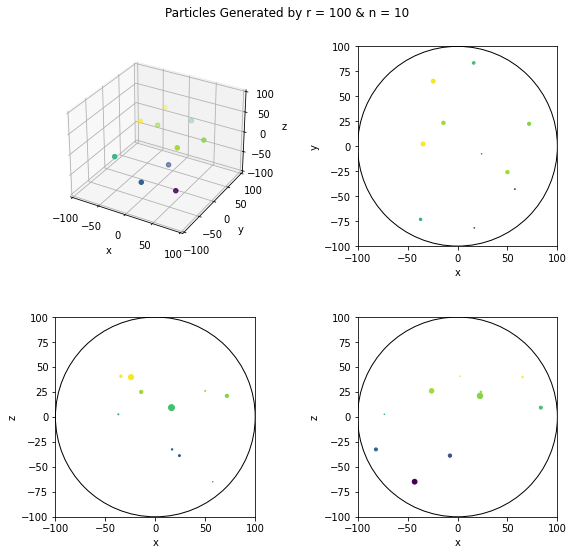

In [2]:
plot_particles(100,10)

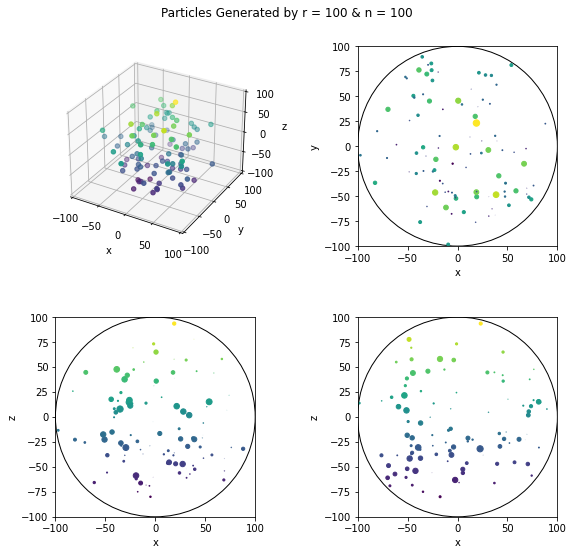

In [3]:
plot_particles(100,100)

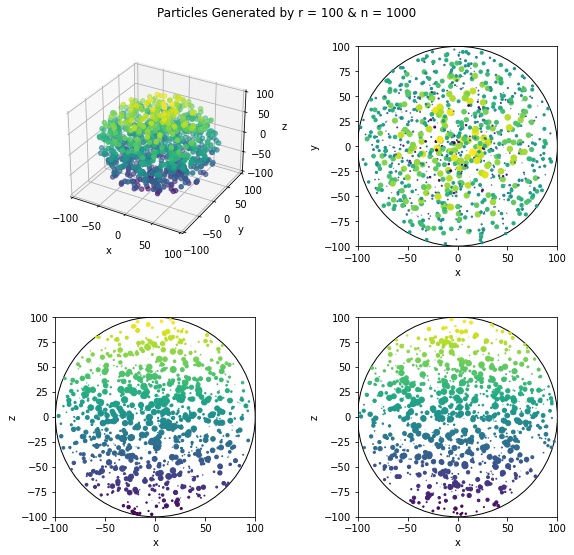

In [4]:
plot_particles(100,1000)

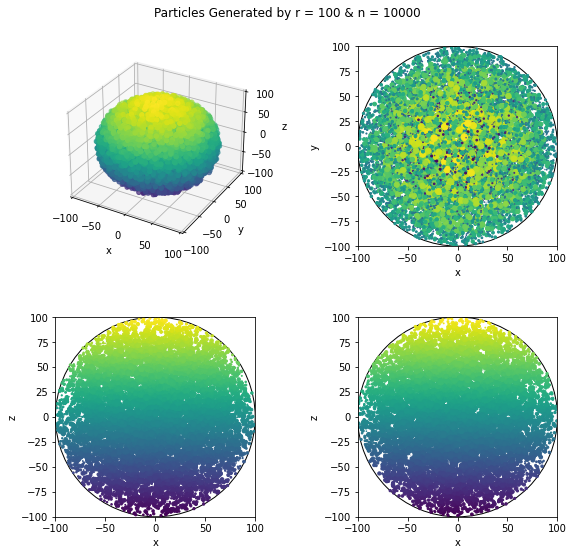

In [5]:
plot_particles(100,10000)

## Calculating Gravitational Potential from Sample
Given we have density $\rho$, radius $a$ and number of particles $n$, the mass $m$ of each particle is
$$m=\frac{\rho*a^3}{n}$$

### Calculating the Gravitational Potential of Sample at a Point $r$ from the Center

#### Given density `density`, radius `radius` and number of particles `n_particles`, I calculate and store the mass of the particles thus:

```
mass_particles = (density * (radius ** 3))/n_particles
```

#### Using `spatial` from `scipy`, I calculate the distances from each particle (stored as a 1x3 numpy array of x,y,z coordinates within array `particles`) and the point $(r,0,0)$ (stored in `start_point` as a 1x1x3 numpy array of x,y,z coordinates) thus:

```
d = spatial.distance.cdist(particles,start_point)
```

#### Using `constants` from `scipy`, I can thus calculate and sum the potentials thus:

```
np.sum(-constants.G * (mass_particles**2)/d)
```

### Calculating the Theoretical Gravitational Potential at a Point $r$ from the Center

#### I use this equation:
$$\phi(r) = \left\{
\begin{array}{ll}
-2\pi G\rho(a^2-\frac{1}{3}r^2) & (r\lt a),\\
-\frac{4\pi G\rho a^3}{3r} & (r\gt a).\\
\end{array}
\right.$$

## Plotting Gravitational Potential from Sample with the Theoretical Potential

#### Plotting Radius/Potential for $\rho = 100$, $n = 100$, $r = a$:

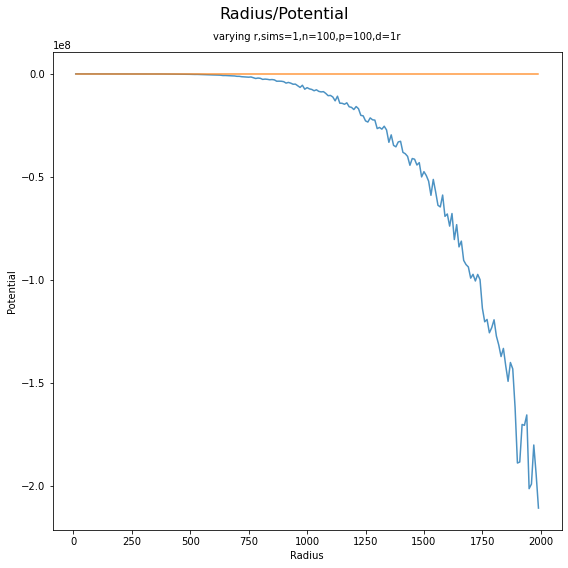

In [7]:
plot_radius_potential(density=100,n_particles=100,point=1,model=None,show_theory=True)

#### Plotting N Particles/Potential for $\rho = 100$, $a = 100$, $r = 0$:

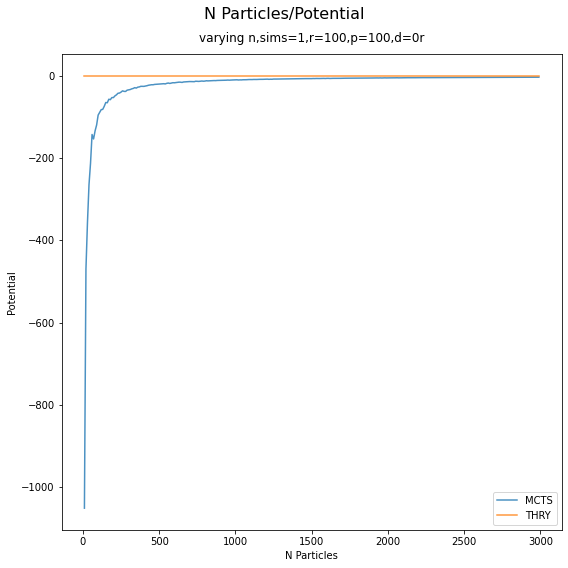

In [8]:
plot_n_potential(density=100,radius=100,point=0,model=None,show_theory=True)

## Fitting Model

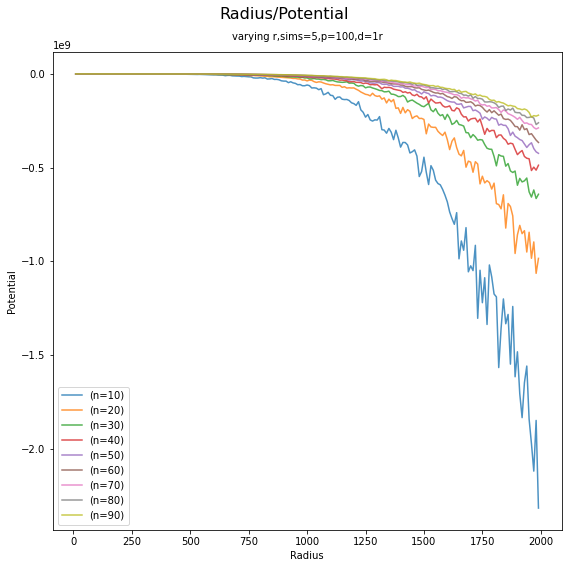

In [12]:
plot_radius_potential(density=100,n_particles=list(range(10,100,10)),point=1,repeats=5,model=None,show_theory=False)

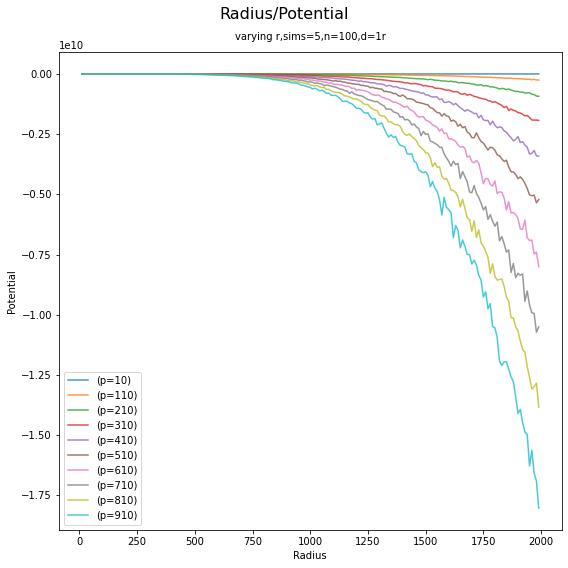

In [13]:
plot_radius_potential(density=list(range(10,1000,100)),n_particles=100,point=1,repeats=5,model=None,show_theory=False)